<AxesSubplot:>

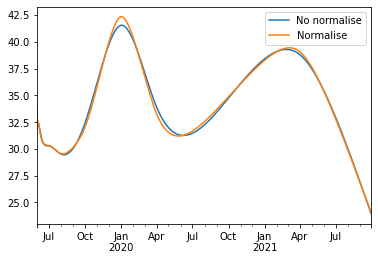

In [23]:
from curves import hyperbolic_tension_spline, bootstrap_contracts
from curves import contract_period as cp
from datetime import date
import pandas as pd

contracts = [
    (date(2019, 5, 31), 34.875), 
    (date(2019, 6, 1), date(2019, 6, 2), 32.87),
    ((date(2019, 6, 3), date(2019, 6, 9)), 32.14),
    (pd.Period(year=2019, month=6, freq='M'), 31.08),
    (cp.month(2019, 7), 29.95),
    (cp.q_3(2019), 30.18),
    (cp.q_4(2019), 37.64),
    (cp.winter(2019), 38.05),
    (cp.summer(2020), 32.39),
    (cp.winter(2020), 37.84),
    (cp.gas_year(2020), 35.12)
]

tension=3.5

def discount_factor(p):
    return 1.0

pc_for_spline, bc_for_spline = bootstrap_contracts(contracts, freq='D')
smooth_curve_no_normalise, _ = hyperbolic_tension_spline(bc_for_spline, freq='D', tension=tension, 
                                                        discount_factor=discount_factor, normalise_tension=False)
smooth_curve_normalise, _ = hyperbolic_tension_spline(bc_for_spline, freq='D', tension=tension, 
                                                        discount_factor=discount_factor, normalise_tension=True)
smooth_curve_no_normalise.plot(legend=True, label='No normalise')
smooth_curve_normalise.plot(legend=True, label='Normalise')